In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the training dataset
df = pd.read_csv("Data_from_zindi/Train.csv")
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [4]:
# Check missing values for all columns
df.isnull().sum().sort_values(ascending=False)

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [5]:
# Create 'AC_TYPE' column by extracting 3 characters after the space in 'AC'
df.insert(
    loc=df.columns.get_loc('AC') + 1,  # Insert right after 'AC'
    column='AC_TYPE',
    value=df['AC'].astype(str).str.extract(r'\s(\w{3})')  # Extract the 3-char code
)

# Display the updated DataFrame
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,AC_TYPE,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,32A,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,31B,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,32A,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,736,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,320,22.0


In [6]:
# Count number of unique aircraft types
df['AC_TYPE'].nunique()

16

In [7]:
# Display the unique aircraft type codes
df['AC_TYPE'].unique()

array(['32A', '31B', '736', '320', '31A', '332', 'CR9', '343', 'AT7',
       '734', '738', '319', '345', 'M87', '733', '321'], dtype=object)

In [8]:
# Group the data by aircraft type and calculate the mean delay
mean_delay_per_type = df.groupby('AC_TYPE')['target'].mean().sort_values(ascending=False)

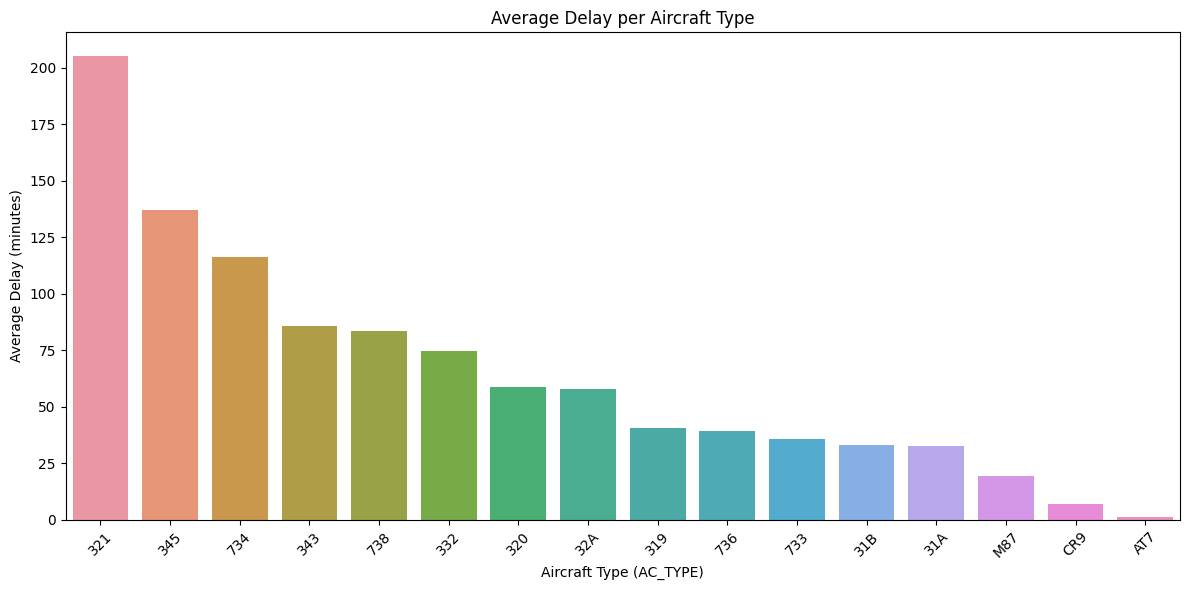

In [9]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_delay_per_type.index, y=mean_delay_per_type.values)

# Set titles and labels
plt.title('Average Delay per Aircraft Type')
plt.xlabel('Aircraft Type (AC_TYPE)')
plt.ylabel('Average Delay (minutes)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Count the number of occurrences per aircraft type
ac_type_counts = df['AC_TYPE'].value_counts().sort_values(ascending=False)

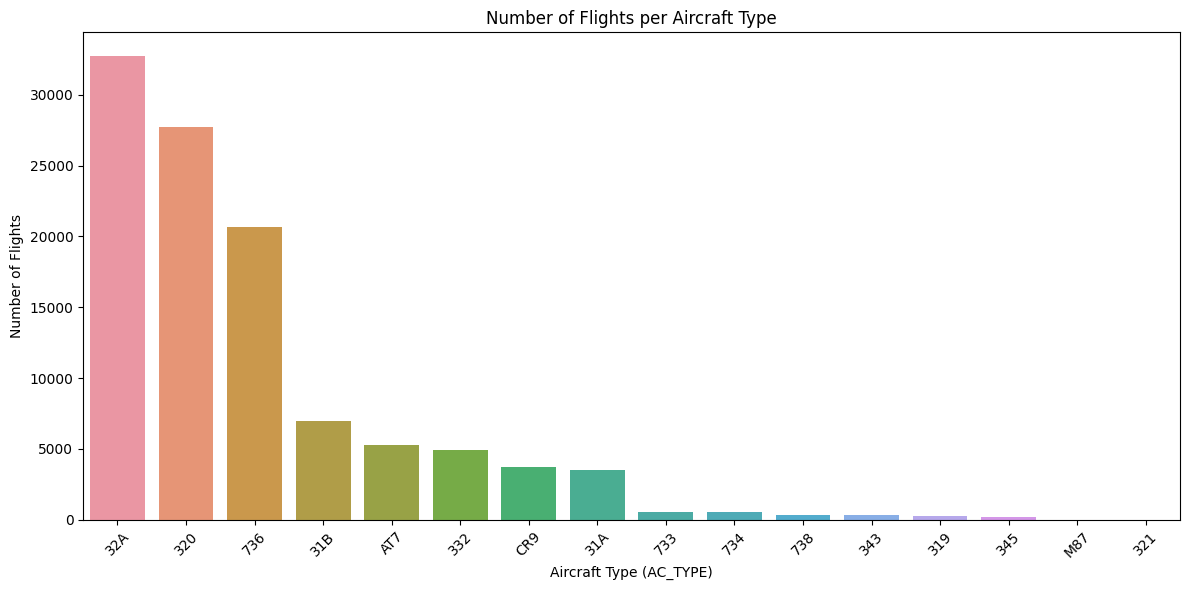

In [11]:
# Set figure size and style
plt.figure(figsize=(12, 6))
sns.barplot(x=ac_type_counts.index, y=ac_type_counts.values)

# Set titles and labels
plt.title('Number of Flights per Aircraft Type')
plt.xlabel('Aircraft Type (AC_TYPE)')
plt.ylabel('Number of Flights')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()